In [33]:
import pandas as pd 
import numpy as np
import numpy as py 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
import os
import glob

In [3]:
path = "C:/university/personal project/AirwayBR/Analyze Airway"
files = [file for file in os.listdir(path) if file.endswith('.csv')] 

data = pd.DataFrame()

for file in files:
    current_data = os.path.join(path, file)
    df = pd.read_csv(current_data)
    data = pd.concat([data, df], ignore_index=True)
data = data.drop_duplicates()   
data.to_csv("data.csv", index=False)


In [3]:
data = pd.read_csv("C:/university/personal project/AirwayBR/Analyze Airway/data.csv")

In [4]:

data


,Unnamed: 0,ID,label,user,text,date,rating,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,0,anchor858044,"""Total garbage""",Cosmin Stefanescu,"Not Verified | I flew with numerous airlines, ...",16th June 2023,1,NaN,Solo Leisure,Economy Class,Bucharest to Dallas via London,June 2023,2.0,4.0,3.0,3.0,1.0,1.0,1,no
1,1,anchor857480,"""arrived at the airport only 1 hour before""",Emmeline Reichert,✅ Trip Verified | We were traveling as a fami...,13th June 2023,3,NaN,Family Leisure,Economy Class,Gatwick to Venice,June 2023,3.0,5.0,4.0,NaN,1.0,1.0,3,no
2,2,anchor857219,"""so callous and uncaring""",Jamie Gooding,✅ Trip Verified | Flight at 8.40am from DUB to...,12th June 2023,1,NaN,Solo Leisure,Economy Class,Dublin to London City,June 2023,1.0,1.0,NaN,NaN,1.0,1.0,1,no
3,3,anchor857147,"""uncomfy old planes""",Michael Hayward,✅ Trip Verified | Terrible. I have traveled t...,11th June 2023,1,NaN,Business,Business Class,Tokyo to Manchester via Heathrow,June 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no
4,4,anchor857019,"""never fly British Airway ever again""",George W Edmonds,✅ Trip Verified | The customer service is ugl...,11th June 2023,1,NaN,Solo Leisure,Economy Class,San Francisco to London,June 2023,NaN,NaN,NaN,NaN,1.0,1.0,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,95,anchor627157,"""I felt like a nuisance""",S Bamato,✅ Trip Verified | Johannesburg to London . Fo...,19th December 2018,4,NaN,Solo Leisure,Economy Class,Johannesburg to London,December 2018,3.0,2.0,3.0,2.0,3.0,3.0,3,no
3096,96,anchor627178,"""Poor cabin staff attitude""",C Dawson,✅ Trip Verified | Bridgetown to Gatwick. Book...,19th December 2018,1,Boeing 777,Couple Leisure,Business Class,Bridgetown to Gatwick,December 2018,1.0,1.0,2.0,NaN,2.0,2.0,1,no
3097,97,anchor627085,"""crew were very friendly""",Gavin Morrison,✅ Trip Verified | Glasgow to New York via Lon...,18th December 2018,8,A319 / Boeing 777,Couple Leisure,Economy Class,Glasgow to New York via London,December 2018,4.0,5.0,5.0,5.0,2.0,2.0,4,yes
3098,98,anchor627061,"""would not recommend BA""",J Leeson,✅ Trip Verified | Sydney to London via Singap...,18th December 2018,2,Boeing 777,Business,Business Class,Sydney to London via Singapore,December 2018,1.0,1.0,1.0,1.0,2.0,2.0,1,no


In [5]:
data.isnull().sum()

Unnamed: 0                   0
ID                           0
label                        0
user                         0
text                         0
date                         0
rating                       0
Aircraft                  1246
Type Of Traveller          297
Seat Type                    2
Route                      302
Date Flown                 305
Seat Comfort               104
Cabin Staff Service        114
Food & Beverages           353
Inflight Entertainment    1071
Ground Service             366
Wifi & Connectivity        366
Value For Money              0
Recommended                  0
dtype: int64

In [6]:
data['Recommended'] = data['Recommended'].map({'yes': 1, 'no': 0})
data['Recommended']

0       0
1       0
2       0
3       0
4       0
       ..
3095    0
3096    0
3097    1
3098    0
3099    0
Name: Recommended, Length: 3100, dtype: int64

In [7]:
rating_data = data[["Seat Comfort",
                 "Cabin Staff Service", 
                 "Food & Beverages",
                 "Inflight Entertainment",
                 "Ground Service", 
                 "Wifi & Connectivity",
                 "Value For Money", 
                 "rating", "Recommended"
                 ]]
rating_data

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,rating,Recommended
0,2.0,4.0,3.0,3.0,1.0,1.0,1,1,0
1,3.0,5.0,4.0,NaN,1.0,1.0,3,3,0
2,1.0,1.0,NaN,NaN,1.0,1.0,1,1,0
3,1.0,1.0,1.0,1.0,1.0,1.0,1,1,0
4,NaN,NaN,NaN,NaN,1.0,1.0,1,1,0
...,...,...,...,...,...,...,...,...,...
3095,3.0,2.0,3.0,2.0,3.0,3.0,3,4,0
3096,1.0,1.0,2.0,NaN,2.0,2.0,1,1,0
3097,4.0,5.0,5.0,5.0,2.0,2.0,4,8,1
3098,1.0,1.0,1.0,1.0,2.0,2.0,1,2,0


In [8]:
rating_data = rating_data.fillna(rating_data.median())
rating_data

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,rating,Recommended
0,2.0,4.0,3.0,3.0,1.0,1.0,1,1,0
1,3.0,5.0,4.0,3.0,1.0,1.0,3,3,0
2,1.0,1.0,3.0,3.0,1.0,1.0,1,1,0
3,1.0,1.0,1.0,1.0,1.0,1.0,1,1,0
4,3.0,3.0,3.0,3.0,1.0,1.0,1,1,0
...,...,...,...,...,...,...,...,...,...
3095,3.0,2.0,3.0,2.0,3.0,3.0,3,4,0
3096,1.0,1.0,2.0,3.0,2.0,2.0,1,1,0
3097,4.0,5.0,5.0,5.0,2.0,2.0,4,8,1
3098,1.0,1.0,1.0,1.0,2.0,2.0,1,2,0


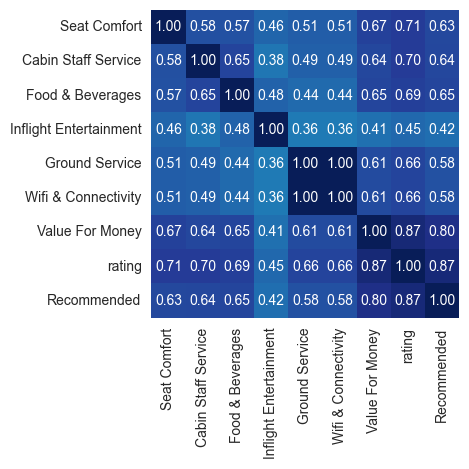

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,rating,Recommended
Seat Comfort,1.000000,0.581021,0.574475,0.462259,0.506329,0.506329,0.668646,0.708916,0.631996
Cabin Staff Service,0.581021,1.000000,0.654463,0.379249,0.485713,0.485713,0.638662,0.703126,0.636957
Food & Beverages,0.574475,0.654463,1.000000,0.476680,0.439076,0.439076,0.646745,0.687033,0.648138
Inflight Entertainment,0.462259,0.379249,0.476680,1.000000,0.364614,0.364614,0.413258,0.447182,0.419830
Ground Service,0.506329,0.485713,0.439076,0.364614,1.000000,1.000000,0.614309,0.655253,0.575882
Wifi & Connectivity,0.506329,0.485713,0.439076,0.364614,1.000000,1.000000,0.614309,0.655253,0.575882
Value For Money,0.668646,0.638662,0.646745,0.413258,0.614309,0.614309,1.000000,0.873462,0.798078
rating,0.708916,0.703126,0.687033,0.447182,0.655253,0.655253,0.873462,1.000000,0.865065
Recommended,0.631996,0.636957,0.648138,0.419830,0.575882,0.575882,0.798078,0.865065,1.000000


In [9]:
#Plot the correlation 
plt.figure(figsize=(4, 4))
sns.heatmap(rating_data[rating_data.select_dtypes('number').columns].corr(),
            square=True, cmap="YlGnBu", cbar=False, annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.show()
rating_data.corr()

In [10]:
#check recommended rating 
rating_data[rating_data['Recommended'] == 1].describe().T.transpose()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,rating,Recommended
count,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.0
mean,3.907731,4.387365,3.817955,3.379884,3.733998,3.733998,4.094763,8.043225,1.0
std,0.963890,0.869854,1.071151,1.053239,1.084944,1.084944,0.844478,1.567068,0.0
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0
25%,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,7.000000,1.0
50%,4.000000,5.000000,4.000000,3.000000,4.000000,4.000000,4.000000,8.000000,1.0
75%,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,9.000000,1.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,1.0


In [11]:
#check recommended rating 
rating_data[rating_data['Recommended'] == 0].describe().T.transpose()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,rating,Recommended
count,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.0
mean,2.173959,2.482868,2.011070,2.400105,2.084344,2.084344,1.710596,2.462836,0.0
std,1.079780,1.258241,1.011215,1.019152,1.176086,1.176086,0.897758,1.584077,0.0
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,0.0
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,0.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,0.0


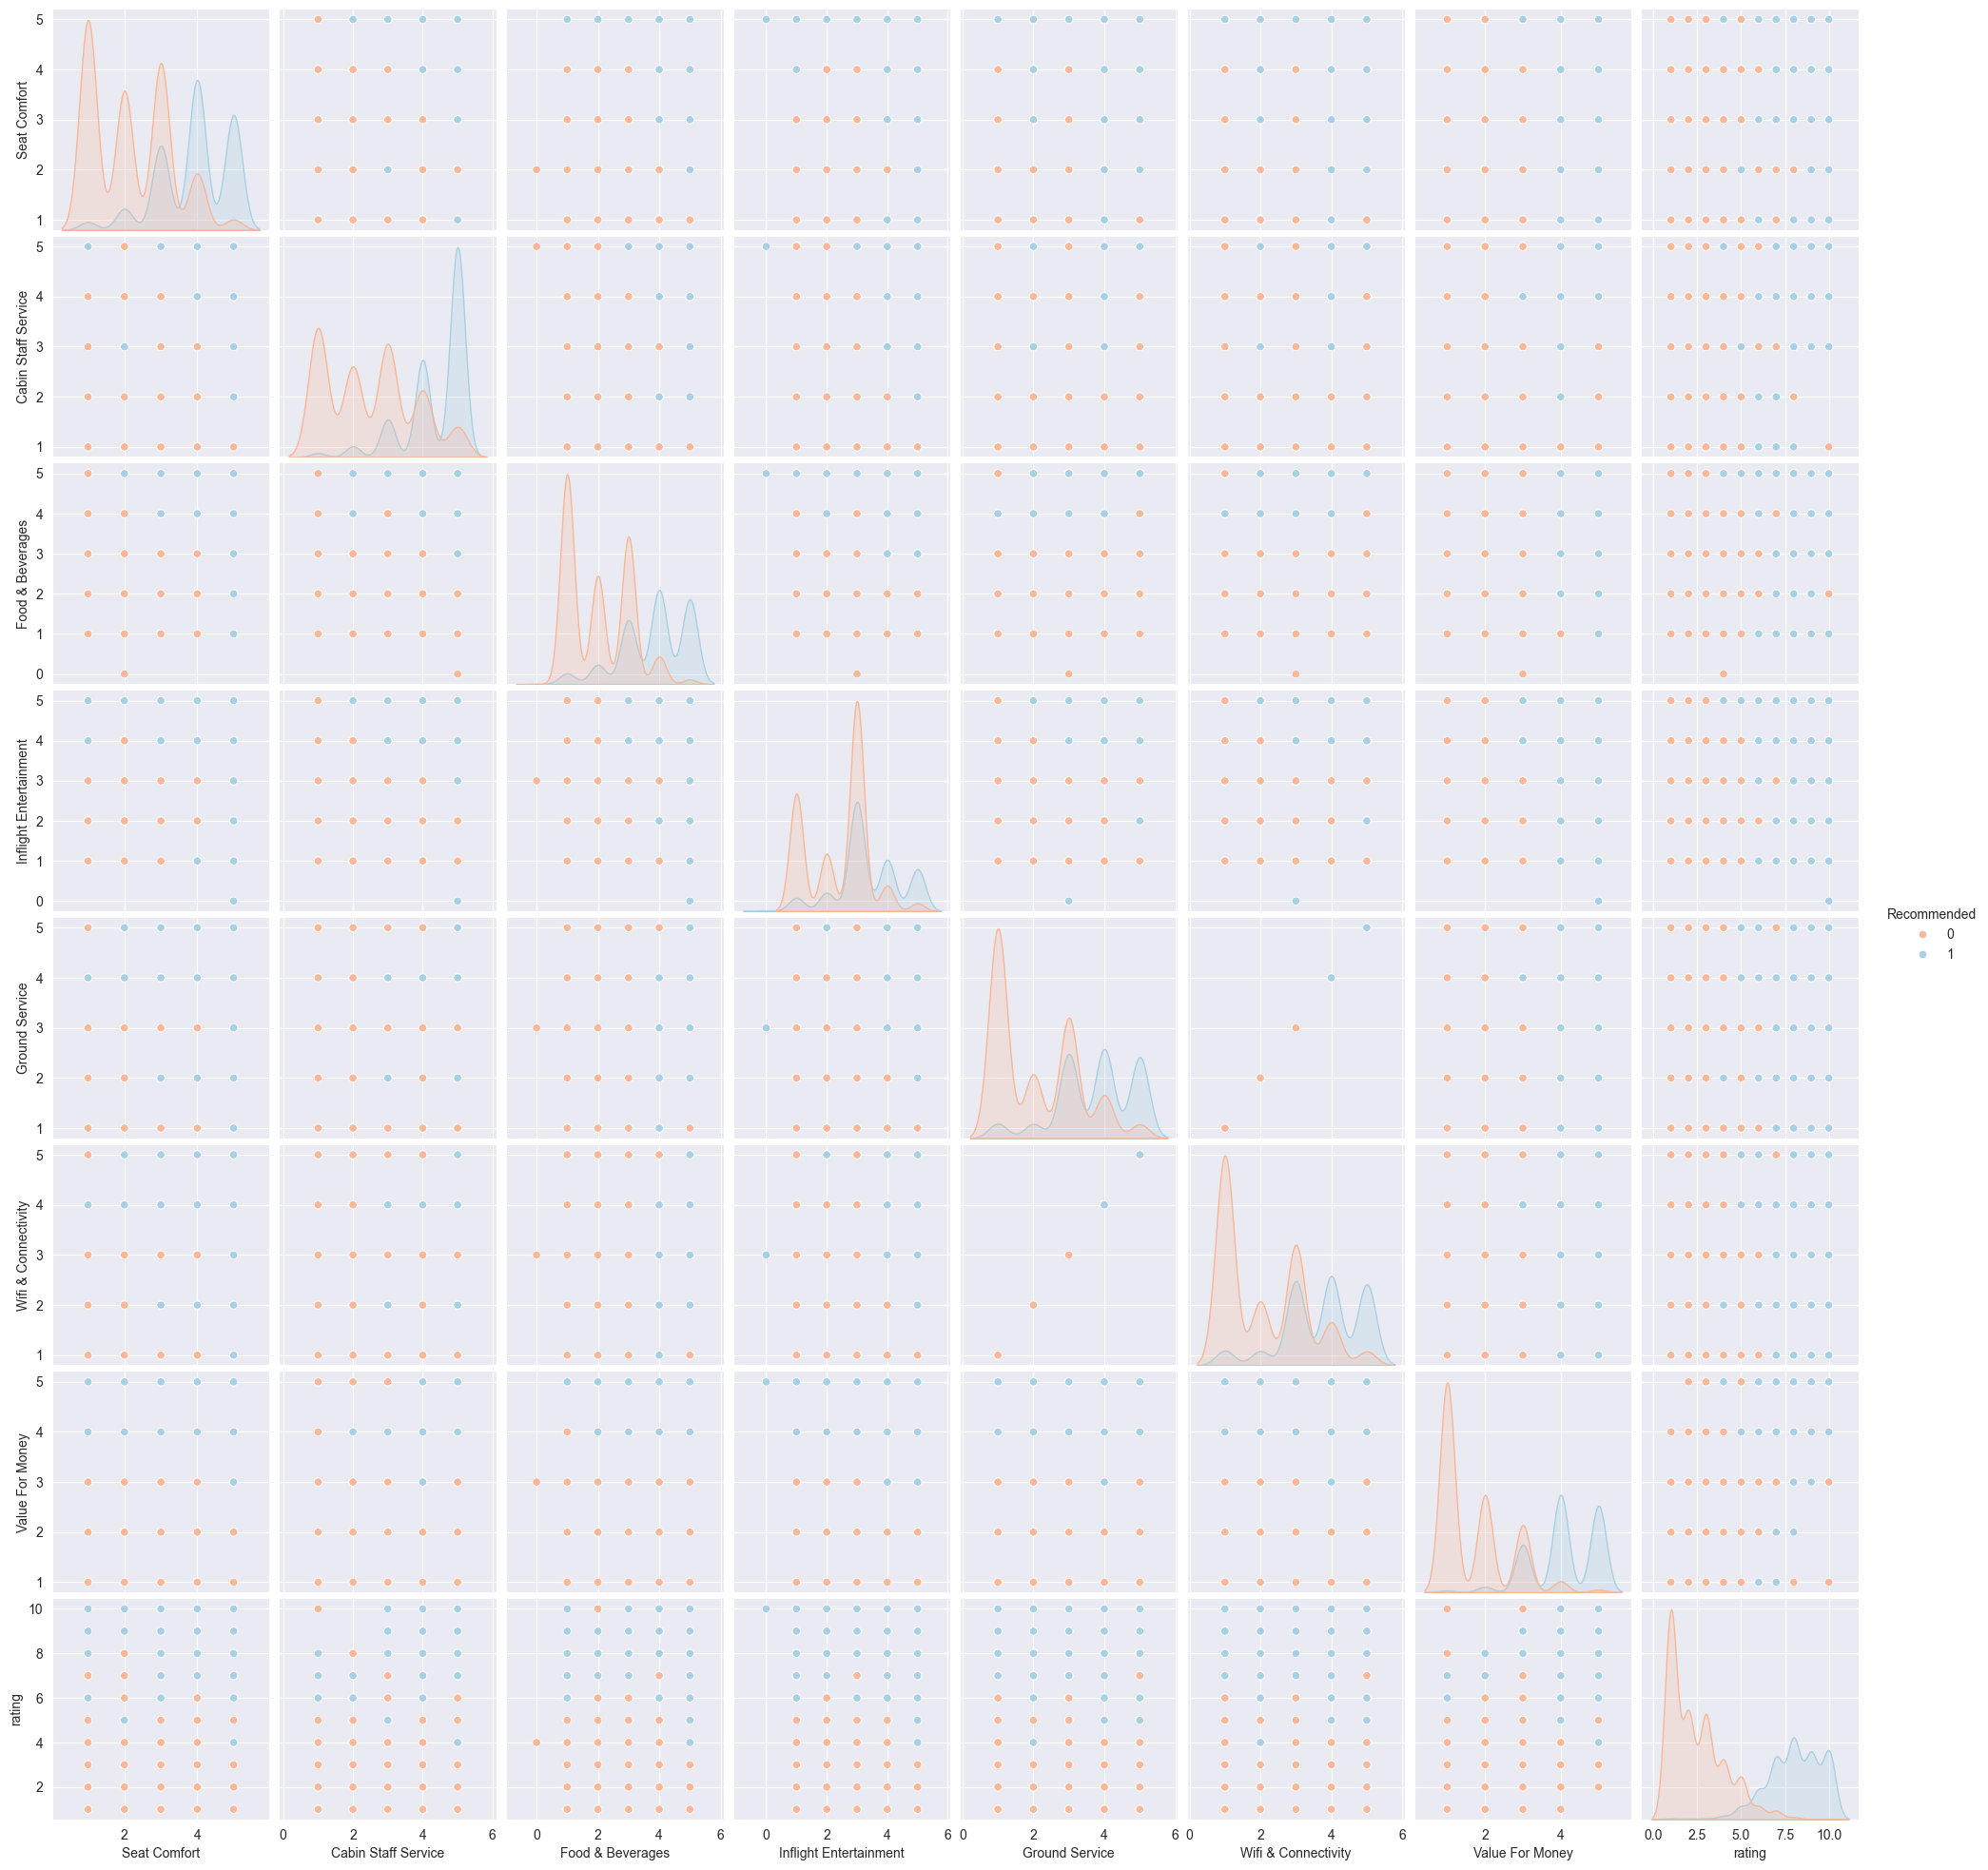

In [13]:
sns.pairplot(rating_data, hue='Recommended', palette = "RdBu")

# Push data into sqlite


In [13]:
from sqlalchemy import create_engine 

In [14]:
disk_engine = create_engine('sqlite:///AB.db')
data.to_sql('Airline', disk_engine, if_exists='replace')

3100

# Predict user's recommend

In [19]:
df = rating_data.drop("Inflight Entertainment", axis=1)
df

,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Wifi & Connectivity,Value For Money,rating,Recommended
0,2.0,4.0,3.0,1.0,1.0,1,1,0
1,3.0,5.0,4.0,1.0,1.0,3,3,0
2,1.0,1.0,3.0,1.0,1.0,1,1,0
3,1.0,1.0,1.0,1.0,1.0,1,1,0
4,3.0,3.0,3.0,1.0,1.0,1,1,0
...,...,...,...,...,...,...,...,...
3095,3.0,2.0,3.0,3.0,3.0,3,4,0
3096,1.0,1.0,2.0,2.0,2.0,1,1,0
3097,4.0,5.0,5.0,2.0,2.0,4,8,1
3098,1.0,1.0,1.0,2.0,2.0,1,2,0


In [23]:
X = df.iloc[:, [0,6]].values
Y = df.iloc[:, 7].values

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [24]:
# Splitting the dataset 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [27]:
# Feature Scaling
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [29]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)

SVC(kernel='linear', random_state=0)

In [30]:
Y_Pred = classifier.predict(X_Test) #predict test set

C:\Users\hoduo\AppData\Local\Temp\ipykernel_44768\4147693120.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],


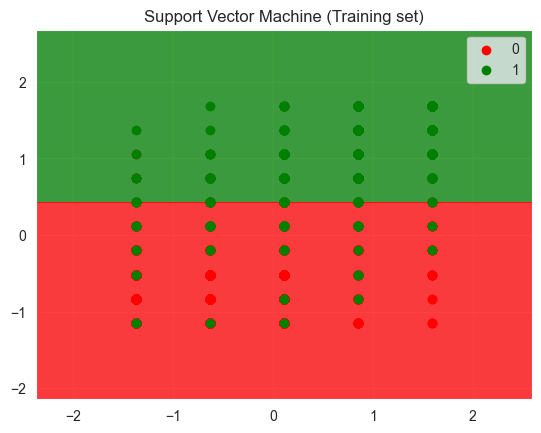

In [40]:
# Visualising the Training set results

from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
                     
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Training set)')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [43]:
accuracy_score(Y_Test, Y_Pred)

0.9432258064516129

In [45]:
cm = confusion_matrix(Y_Test, Y_Pred)
cm

array([[461,  15],
       [ 29, 270]], dtype=int64)